<a href="https://colab.research.google.com/github/terran3125/terran3125/blob/main/3%EC%A3%BC%EC%B0%A8_XGBoost_OliveOil_with_output_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#EC5320 Week3b codes: XGBoost

2022.3.21.<br>

Author: Hyunjoo Yang (hyang@sogang.ac.kr)<br><br>

This notebook uses XGBoost to classify the country of origin of olive oil.<br><br>

Tabular data source **(Search 'Olive Oil' data)**: <br>
http://www.timeseriesclassification.com/dataset.php 

# 1. Install and import libraries

In [ ]:
import numpy as np
from matplotlib.pyplot import imshow
from google.colab import files

# 2. Download file

In [ ]:
!wget -O olive_oil.zip 'https://www.dropbox.com/s/uot1ncw4qz5s2n3/OliveOil.zip?dl=0'

--2022-03-23 01:46:04--  https://www.dropbox.com/s/i7g4926obe0s4wq/OliveOil.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:601b:18::a27d:812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/i7g4926obe0s4wq/OliveOil.zip [following]
--2022-03-23 01:46:04--  https://www.dropbox.com/s/raw/i7g4926obe0s4wq/OliveOil.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucfe7c0fb5510726657635057934.dl.dropboxusercontent.com/cd/0/inline/Bh_CBWts7Msxez7G--WfiM6fVQHChX35jwV374Lrsqb5RDhXs9oV9VA31JH8r_DeB98RLiiCyvNCxRf2OOVIwloWTWF5YJZJM1XKt6tc_zupkeqiY3BPxBFcJ6ACoyn21dQfEfxZiJkW5pGqFCkz6Q6-bYy5gBiguKiEWTE7qZU4lA/file# [following]
--2022-03-23 01:46:04--  https://ucfe7c0fb5510726657635057934.dl.dropboxusercontent.com/cd/0/inline/Bh_CBWts7Msxez7G--WfiM6fVQHChX35jwV374Lrsqb5RDhXs9oV9VA31JH8r_D

In [ ]:
%%capture

!unzip olive_oil.zip -d olive_oil

In [ ]:
!ls olive_oil

OliveOil_TEST.arff  OliveOil_TEST.txt	 OliveOil_TRAIN.ts   OliveOil.txt
OliveOil_TEST.ts    OliveOil_TRAIN.arff  OliveOil_TRAIN.txt


# 3. Load raw files as Pandas dataframes

In [ ]:
from pathlib import Path

In [ ]:
train_csv = Path('olive_oil/OliveOil_TRAIN.txt')
valid_csv = Path('olive_oil/OliveOil_TEST.txt')

In [ ]:
import pandas as pd

In [ ]:
train_df = pd.read_csv(train_csv, delim_whitespace=True, header=None)
train_df

,0,1,2,3,4,5,6,7,8,9,...,561,562,563,564,565,566,567,568,569,570
0,1.0,-0.611375,-0.610586,-0.606557,-0.601132,-0.594315,-0.585762,-0.577419,-0.570175,-0.563285,...,-0.979553,-0.980385,-0.980328,-0.980220,-0.980691,-0.981337,-0.982336,-0.983213,-0.983672,-0.983120
1,1.0,-0.615392,-0.613729,-0.609228,-0.604315,-0.598768,-0.590507,-0.581617,-0.572926,-0.565374,...,-0.979210,-0.979335,-0.979523,-0.980038,-0.981146,-0.982332,-0.982570,-0.982630,-0.982850,-0.982549
2,1.0,-0.611999,-0.610500,-0.606374,-0.600445,-0.593084,-0.585245,-0.577118,-0.568827,-0.561596,...,-0.979514,-0.979663,-0.979964,-0.980563,-0.981326,-0.982744,-0.983107,-0.983033,-0.983956,-0.983858
3,1.0,-0.622784,-0.622222,-0.619049,-0.613251,-0.605889,-0.597508,-0.589047,-0.580697,-0.572822,...,-0.968819,-0.969902,-0.970586,-0.970718,-0.971197,-0.972268,-0.972654,-0.972861,-0.973671,-0.973614
4,1.0,-0.621793,-0.621272,-0.617298,-0.612074,-0.605472,-0.597607,-0.589165,-0.581424,-0.574620,...,-0.977420,-0.977831,-0.978376,-0.978778,-0.979656,-0.981148,-0.981796,-0.981331,-0.981289,-0.981331
5,2.0,-0.600229,-0.599577,-0.596144,-0.590664,-0.583358,-0.574398,-0.565483,-0.557200,-0.549211,...,-0.986319,-0.987329,-0.987618,-0.988062,-0.988807,-0.989265,-0.989560,-0.989695,-0.990430,-0.990874
6,2.0,-0.615430,-0.614164,-0.610041,-0.603962,-0.596794,-0.588885,-0.579624,-0.571410,-0.564899,...,-0.978359,-0.978609,-0.979123,-0.979192,-0.979726,-0.980732,-0.980855,-0.981049,-0.982046,-0.982640
7,2.0,-0.614015,-0.612369,-0.608472,-0.602971,-0.596025,-0.588022,-0.579095,-0.570355,-0.562975,...,-0.977127,-0.977156,-0.977082,-0.978072,-0.978743,-0.979156,-0.980033,-0.980179,-0.980446,-0.981325
8,2.0,-0.596650,-0.595023,-0.591794,-0.586665,-0.579232,-0.571202,-0.562909,-0.554685,-0.547703,...,-0.986295,-0.986149,-0.986728,-0.987620,-0.988761,-0.989280,-0.989334,-0.989841,-0.990268,-0.990883
9,2.0,-0.620747,-0.620111,-0.616434,-0.611036,-0.603726,-0.595674,-0.587556,-0.579830,-0.573194,...,-0.975419,-0.975879,-0.976500,-0.977168,-0.977320,-0.977985,-0.978558,-0.978633,-0.978808,-0.979470


In [ ]:
valid_df = pd.read_csv(valid_csv, delim_whitespace=True, header=None)
valid_df

,0,1,2,3,4,5,6,7,8,9,...,561,562,563,564,565,566,567,568,569,570
0,1.0,-0.621957,-0.620677,-0.616684,-0.611012,-0.603769,-0.595267,-0.586477,-0.577899,-0.570147,...,-0.966336,-0.967106,-0.967484,-0.967454,-0.967817,-0.968638,-0.969142,-0.969541,-0.970344,-0.970377
1,1.0,-0.618925,-0.618361,-0.614664,-0.608693,-0.601446,-0.593516,-0.585786,-0.577708,-0.569952,...,-0.971519,-0.971990,-0.972353,-0.973022,-0.973667,-0.973943,-0.974423,-0.974906,-0.975525,-0.975858
2,1.0,-0.618169,-0.616704,-0.612678,-0.607578,-0.600574,-0.592209,-0.584307,-0.576085,-0.567684,...,-0.976493,-0.976940,-0.977284,-0.977284,-0.977531,-0.978806,-0.979570,-0.979820,-0.980319,-0.980089
3,1.0,-0.613445,-0.611719,-0.607739,-0.602477,-0.595154,-0.587271,-0.579135,-0.570903,-0.563252,...,-0.976533,-0.977072,-0.977317,-0.977812,-0.978423,-0.979332,-0.979976,-0.980131,-0.980358,-0.980385
4,1.0,-0.616338,-0.615301,-0.611505,-0.605503,-0.597522,-0.589108,-0.580610,-0.572432,-0.565709,...,-0.974940,-0.975242,-0.975344,-0.975936,-0.976761,-0.977364,-0.977648,-0.978043,-0.978808,-0.978584
5,2.0,-0.618782,-0.617716,-0.613997,-0.608234,-0.601079,-0.593254,-0.585160,-0.577374,-0.569800,...,-0.974467,-0.974664,-0.974808,-0.975386,-0.975538,-0.976176,-0.977076,-0.977115,-0.977705,-0.978321
6,2.0,-0.618084,-0.615795,-0.611206,-0.605597,-0.598689,-0.591469,-0.583601,-0.574438,-0.567063,...,-0.974884,-0.975553,-0.975290,-0.975443,-0.976166,-0.977054,-0.977661,-0.977825,-0.977879,-0.978005
7,2.0,-0.611166,-0.610133,-0.606317,-0.600795,-0.593912,-0.585110,-0.576604,-0.569136,-0.562062,...,-0.981540,-0.981895,-0.982864,-0.983285,-0.983986,-0.985206,-0.985308,-0.985060,-0.985320,-0.986107
8,2.0,-0.611302,-0.610611,-0.607795,-0.601815,-0.594525,-0.586312,-0.577069,-0.568377,-0.561396,...,-0.977748,-0.978070,-0.978492,-0.979135,-0.980142,-0.981493,-0.982160,-0.981877,-0.981701,-0.982029
9,2.0,-0.622387,-0.621123,-0.617521,-0.612813,-0.606186,-0.598040,-0.590471,-0.582751,-0.574777,...,-0.977619,-0.978230,-0.978459,-0.978754,-0.979418,-0.980146,-0.980762,-0.981045,-0.981799,-0.982103


In [ ]:
# concatenate train and valid set together

df = pd.concat([train_df, valid_df])
df.shape

(60, 571)

# 4. Create label arrays (ground truth data)

In [ ]:
y_train = train_df[[0]].to_numpy(dtype=int).reshape(-1)
y_valid = valid_df[[0]].to_numpy(dtype=int).reshape(-1)

In [ ]:
# label encoder (e.g, change ['bear', 'rabbit', 'dog'] to [0,1,2])

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

y_train_new = le.fit_transform(y_train)
y_valid_new = le.transform(y_valid)

y_train_new

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3])

In [ ]:
y_train

array([1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4])

In [ ]:
# from new to old label
le.inverse_transform([0, 1, 2, 3])

array([1, 2, 3, 4])

# 5. Remove labels from df and scale feature values

In [ ]:
# scale using standard score

from sklearn.preprocessing import StandardScaler

# load scaler
scaler = StandardScaler()

# scale train and valid sets

# transform dataframes (take out first column which is label)
X_train = pd.DataFrame(scaler.fit_transform(train_df.iloc[:, 1:]), dtype='float32')
X_valid = pd.DataFrame(scaler.transform(valid_df.iloc[:, 1:]), dtype='float32')


In [ ]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,560,561,562,563,564,565,566,567,568,569
0,0.074444,0.008982,0.020318,-0.016441,-0.075750,-0.040916,-0.046279,-0.188316,-0.287316,-0.302234,...,-0.502074,-0.558516,-0.480037,-0.387893,-0.355388,-0.304483,-0.390263,-0.513844,-0.512308,-0.399747
1,-0.500693,-0.441718,-0.366356,-0.483508,-0.721528,-0.720837,-0.655789,-0.588441,-0.589301,-0.665499,...,-0.445824,-0.384726,-0.347853,-0.358135,-0.429220,-0.464861,-0.427511,-0.420804,-0.380978,-0.309218
2,-0.014848,0.021233,0.046802,0.084359,0.102749,0.033088,-0.002560,0.007772,-0.043098,-0.111324,...,-0.495706,-0.439093,-0.420355,-0.444105,-0.458343,-0.531228,-0.512967,-0.485126,-0.557747,-0.516959
3,-1.559304,-1.659254,-1.788237,-1.794872,-1.754128,-1.724186,-1.734690,-1.718506,-1.666124,-1.656418,...,1.255643,1.176541,1.119176,1.167714,1.184667,1.156504,1.150386,1.138350,1.085986,1.109206
4,-1.417399,-1.523114,-1.534738,-1.622112,-1.693665,-1.738378,-1.751807,-1.824182,-1.926051,-1.901045,...,-0.152745,-0.135717,-0.159628,-0.151777,-0.187440,-0.274143,-0.304239,-0.213492,-0.131465,-0.115807


# 6. Plot some data

In [ ]:
import matplotlib.pyplot as plt

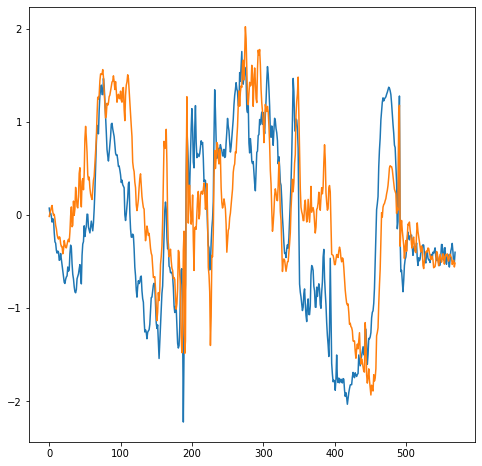

In [ ]:
# plot some rows (class = 1)

plt.figure(figsize=(8, 8))
plt.plot(X_train.iloc[0])
plt.plot(X_train.iloc[2])
plt.show()

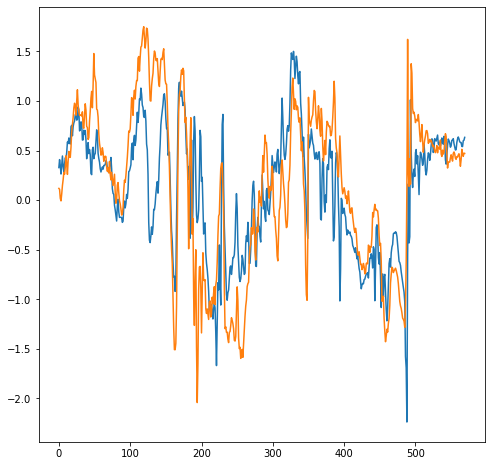

In [ ]:
# plot some rows (class = 4)

plt.figure(figsize=(8, 8))
plt.plot(X_train.iloc[24])
plt.plot(X_train.iloc[28])
plt.show()

# 7. Classify using XGBoost

## 7.1 Import faiss for K-means and XGBoost library

In [ ]:
# import up-to-date xgboost

!pip uninstall --yes xgboost # remove xgboost 0.90 코랩에 자동으로 깔려 있는 건 옛날 버전이어서 지우고 
!pip install xgboost # install 1.5.2 새로 깔아야 해. 성능차이가 꽤 난다.

Found existing installation: xgboost 0.90
Uninstalling xgboost-0.90:
  Successfully uninstalled xgboost-0.90
     |████████████████████████████████| 173.6 MB 7.1 kB/s 


In [ ]:
import xgboost as xgb

## 7.2. Train

In [ ]:
# set XGBoost regressor parameters

my_random_seed = 42

xgb_classify = xgb.XGBClassifier(random_state=my_random_seed, use_label_encoder=False) 
# use_label_encoder = True : 텍스트로 된 클래스를 XGBoost에서 숫자로 변환해준다. 근데 우린 이미 돼 있어

In [ ]:
%%time

## train 

# use early stopping
early_stop_rounds = 5 
# 오버피팅 되기 전에 종료
# validation에서 n번까지 돌려도 accuracy가 향상되지 않으면 멈춘다.

# fit
xgb_classify.fit(X_train, y_train_new,
            eval_set=[(X_valid, y_valid_new)], early_stopping_rounds=early_stop_rounds)

[01:46:40] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-mlogloss:1.08214
[1]	validation_0-mlogloss:0.90221
[2]	validation_0-mlogloss:0.78648
[3]	validation_0-mlogloss:0.71805
[4]	validation_0-mlogloss:0.67371
[5]	validation_0-mlogloss:0.64212
[6]	validation_0-mlogloss:0.62549
[7]	validation_0-mlogloss:0.60939
[8]	validation_0-mlogloss:0.60587
[9]	validation_0-mlogloss:0.60580
[10]	validation_0-mlogloss:0.59455
[11]	validation_0-mlogloss:0.58636
[12]	validation_0-mlogloss:0.58358
[13]	validation_0-mlogloss:0.58172
[14]	validation_0-mlogloss:0.58249
[15]	validation_0-mlogloss:0.57804
[16]	validation_0-mlogloss:0.57798
[17]	validation_0-mlogloss:0.57799
[18]	validation_0-mlogloss:0.57803
[19]	validation_0-mlogloss:0.57809
[20]	validation_0-mlogloss:0.57817
[21]	validation_0-mlog

## 7.3 Predict and get accuracy

In [ ]:
# predict

y_predicted_vaild = xgb_classify.predict(X_valid)
y_predicted_vaild

array([2, 2, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 3, 2, 1, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 0, 1])

In [ ]:
from sklearn.metrics import accuracy_score

# evaluate predictions
accuracy = accuracy_score(y_valid_new, y_predicted_vaild)
print("Valid set accuracy: {:.2f}%".format(accuracy * 100.0))

Valid set accuracy: 76.67%


## 7.4 Evaluate performance using confusion matrix

In [ ]:
# confusion matrics

from sklearn.metrics import confusion_matrix

conf_mx = confusion_matrix(y_valid_new, y_predicted_vaild)

In [ ]:
# confusion matrix plot

import itertools

def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix
    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']
    title:        the text to display at the top of the matrix
    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues
    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    plt.figure(figsize=(12, 9))

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.2f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.3f}; misclass={:0.3f}'.format(accuracy, misclass))
    plt.show()

In [ ]:
# get class names
my_classes = le.inverse_transform(xgb_classify.classes_)
my_classes

array([1, 2, 3, 4])

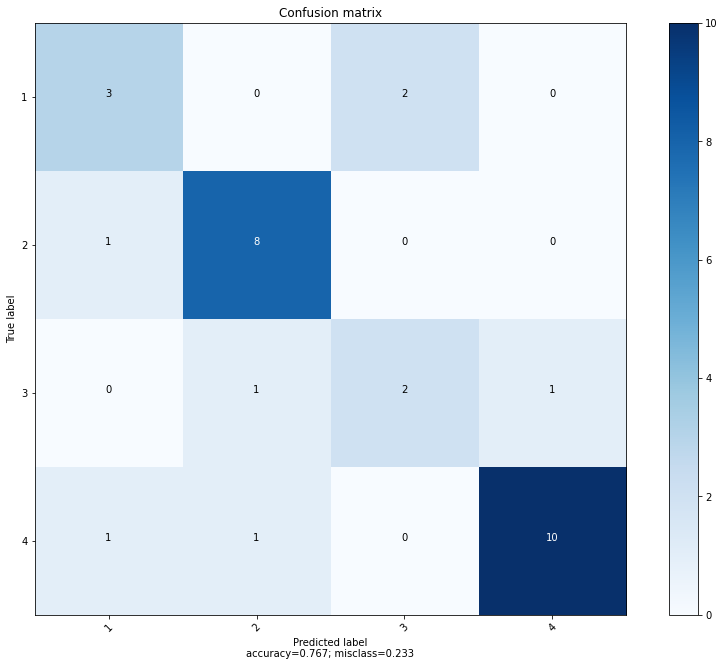

In [ ]:
# plot confusion matrix (raw)

plot_confusion_matrix(conf_mx, my_classes, cmap=None, normalize=False)

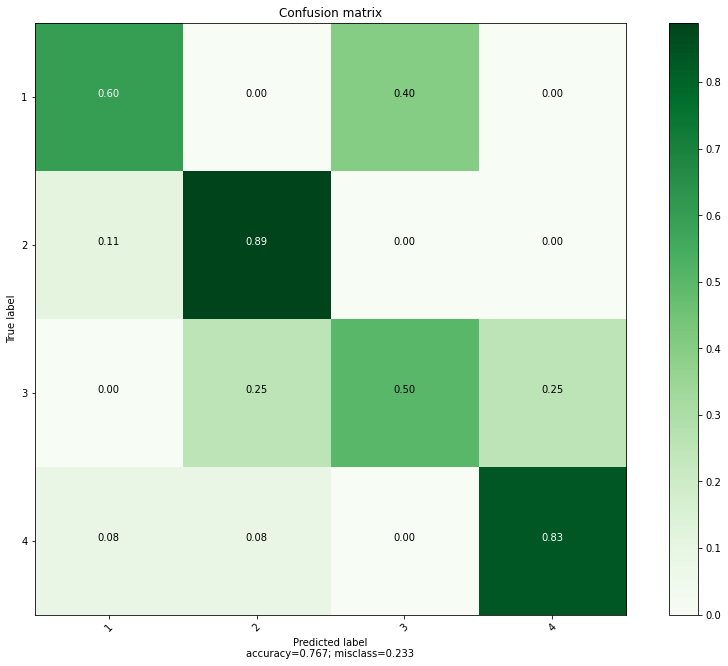

In [ ]:
# plot confusion matrix (proportions)

plot_confusion_matrix(conf_mx, my_classes, cmap='Greens', normalize=True)